In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from skimage.transform import resize

In [2]:
# config
cnn_dir = '../outputs/cnn_labelmaps_20_epochs'
output_path = '../outputs/map_tests/overview_map.png'
target_size = (128, 128)
grid_cols = 6

# load CNN labelmaps
files = sorted(glob(os.path.join(cnn_dir, '*_cnn_labelmap.npy')))
maps = []
names = []

print(f"Found {len(files)} CNN labelmaps")

Found 28 CNN labelmaps


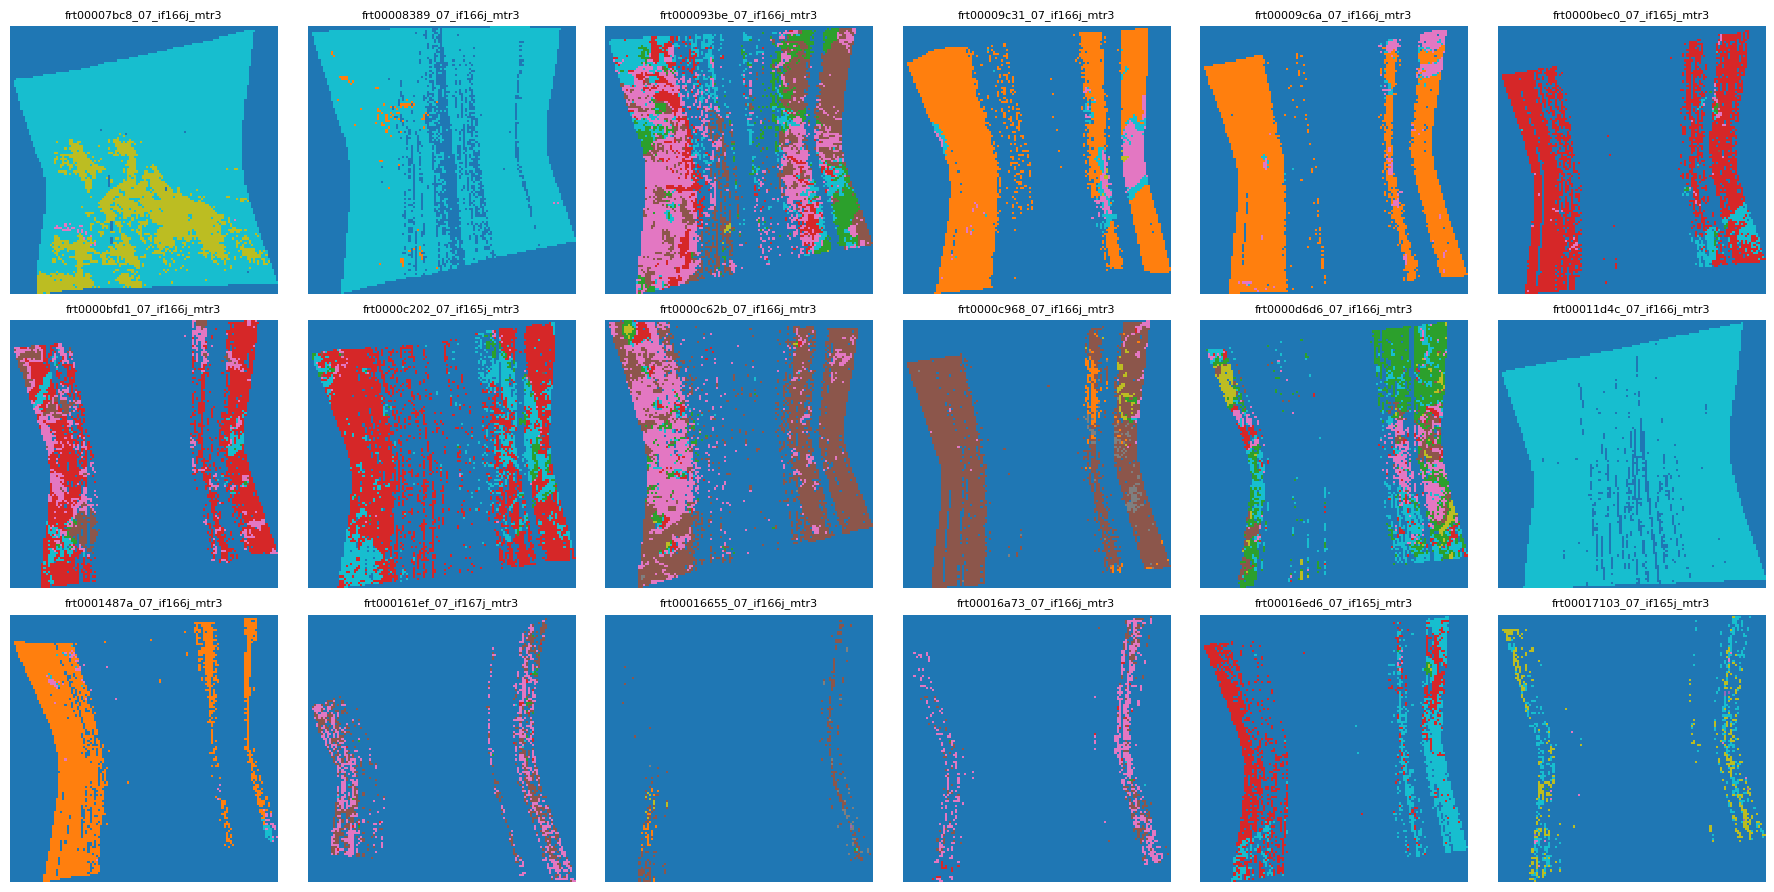

[OK] Composition overview map saved to: ../outputs/map_tests/overview_map.png


In [3]:
for path in files[:grid_cols * 3]:  # limit for simplicity
    cube_name = os.path.basename(path).replace('_cnn_labelmap.npy', '')
    labelmap = np.load(path)

    # resize to fixed dimensions
    labelmap_resized = resize(labelmap, target_size, order=0, preserve_range=True, anti_aliasing=False).astype(int)
    maps.append(labelmap_resized)
    names.append(cube_name)

# build image grid
rows = len(maps) // grid_cols + int(len(maps) % grid_cols > 0)
fig, axs = plt.subplots(rows, grid_cols, figsize=(grid_cols * 3, rows * 3))

for i, ax in enumerate(axs.flat):
    if i < len(maps):
        ax.imshow(maps[i], cmap='tab10', interpolation='nearest')
        ax.set_title(names[i], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

print(f"[OK] Composition overview map saved to: {output_path}")